# Data input

Data acquisition is always a first step in data-driven projects, and quite often it (together with subsequent data curation) takes considerable time and effort within the project.

In general, data can be acquired as:
* downloadable files (e.g. CSV, txt, Excel, JSON files, and other common data formats) - either directly from the web or from the local drive after downloading those first;
* through API (Application Program Interface)
* through databases 

In this lab we will provide examples how to work with downloadable data in the two most common formats:
* comma-separated-values (CSV) or text files (txt) more generally 
* and Excel or XLS files

Also as urban analytics is often inherently spatial we'll consider another specific format often used for the spatial data: JSON, and in particular GEOJSON.

We will also provide some basic descriptive analytics, like getting the number of records, defining timeframes or summing up numeric columns.

It is always a good idea to start data analytics with such descriptive analysis as not only it gives an idea of the scale (and thus utility) of the data, but also allows to spot possible issues. But we shall continue considering descriptive analytics in detail later in the class.

## Dataset 1. The 311 service requests (CSV) in Boston

The data contains all 311 call service requests, including their time, location, type of issue and many other details

Source https://data.boston.gov/dataset/311-service-requests

In [1]:
import pandas as pd #first we'll need module pandas to work with the data frames (this is a main module for that in Python)
#this statement instructs iPython to include the generated visuals within the notebook rather than showing them in separate windows
%matplotlib inline

In [2]:
#lets specify the file location on the web
#we can actually upload the data directly from there!
#the data is provided by year, so consider one of the most "interesting" years - 2020
#current location of the file
url = 'https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/6ff6a6fd-3141-4440-a880-6f60a37fe789/download/tmpcv_10m2s.csv'
#but the data providers use to change the structure of the data storage often, so the link might stop working; if this happens - we can use the local copy of the file; just make sure to place it in the work folder 
#fname = '311_service_requests_2020.csv' #can use it instead of url below once the data is downloaded

In [3]:
boston311 = pd.read_csv(url) #upload the data, parsing a csv file into the pandas dataframe

/var/folders/q3/mpqtmy991gj7fyndmxjgbnth0000gp/T/ipykernel_3724/29629732.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  boston311 = pd.read_csv(url) #upload the data, parsing a csv file into the pandas dataframe


In [4]:
#boston311.to_csv(fname) #this method would save the file locally for further use

In [5]:
#preview the data (outputs the column names and first five rows as an example)
boston311.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,101003148265,2020-01-01 00:07:00,2020-01-13 03:30:00,2020-01-20 06:43:10,OVERDUE,Closed,Case Closed. Closed date : 2020-01-20 11:43:10...,Park Lights - Doherty Playground (BPRD),Parks & Recreation Department,Park Maintenance & Safety,...,Charlestown,2,2,0207,INTERSECTION S Quincy Pl & Saint Martin St,NaN,42.382987,-71.067828,0101000020E6100000ADA5774957C451C01A77A6B30531...,Citizens Connect App
1,101003148266,2020-01-01 00:54:48,2020-01-01 00:54:48,2020-01-02 01:11:49,OVERDUE,Closed,Case Closed. Closed date : 2020-01-02 06:11:49...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Dorchester,8,Ward 17,1702,85 Bloomfield St,2124.0,42.298900,-71.069541,0101000020E6100000E9E56F5A73C451C07E7212574226...,Citizens Connect App
2,101003148268,2020-01-01 01:14:13,2020-01-03 03:30:00,2020-01-01 10:05:46,ONTIME,Closed,Case Closed. Closed date : 2020-01-01 15:05:46...,Requests for Street Cleaning,Public Works Department,Street Cleaning,...,South End,6,Ward 9,0901,423 Shawmut Ave,2118.0,42.340130,-71.074291,0101000020E6100000E2300A2DC1C451C0AAFE665D892B...,Citizens Connect App
3,101003148269,2020-01-01 01:19:00,2020-01-03 03:30:00,2020-01-02 01:10:56,ONTIME,Closed,Case Closed. Closed date : 2020-01-02 06:10:56...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Roxbury,13,Ward 12,1201,6 Moreland St,2119.0,42.325960,-71.082761,0101000020E61000006A0602F34BC551C0EB78EE0AB929...,Constituent Call
4,101003148271,2020-01-01 02:02:00,2020-01-03 03:30:00,2020-01-01 02:07:17,ONTIME,Closed,Case Closed. Closed date : 2020-01-01 07:07:17...,Missed Trash: District 1B,Public Works Department,Sanitation,...,Beacon Hill,14,Ward 5,0503,25-29 Charles St,2114.0,42.356920,-71.069650,0101000020E61000001AD6442775C451C0A731108AAF2D...,Constituent Call


In [6]:
#get the list of columns
boston311.columns

Index(['case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submitted_photo', 'closed_photo',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'geom_4326', 'source'],
      dtype='object')

In [7]:
#get the total number of records (len is used to get the length of any data collections, like lists, dictionaries, sets etc, and pandas dataframe could be also seen as a collection of rows)
len(boston311)

251222

In [8]:
#summary statistics for all the numeric columns - min, max, percentiles, mean, standard deviation; columns of non-numeric types aren't included as for them those quantities can't be assessed
boston311.describe()

,case_enquiry_id,location_zipcode,latitude,longitude
count,2.512220e+05,196540.000000,249132.000000,249132.000000
mean,1.010034e+11,2126.905887,42.324363,-71.081205
std,1.221636e+05,17.836674,0.455815,0.455745
min,1.010031e+11,2108.000000,-71.135810,-71.190497
25%,1.010033e+11,2119.000000,42.299046,-71.105288
50%,1.010034e+11,2126.000000,42.333261,-71.075641
75%,1.010035e+11,2130.000000,42.350642,-71.058860
max,1.010038e+11,2467.000000,42.398393,42.358474


Gives a good idea of how many records have a valid number defined and also averages and ranges for latitute/logitude

statistics for zipcode and id won't make that much sense

as while these data has numeric type its categorical in nature and computing averages/percentiles is somewhat meaningless

Some additional descriptive analysis one might be interested is to learn more about the categorical variables, e.g. subject, reason, type, neighborhood, zip_code

In [9]:
#first let's get the list of unique values for each, or at least the number of such values
boston311.subject.unique()

array(['Parks & Recreation Department',
       'Transportation - Traffic Division', 'Public Works Department',
       "Mayor's 24 Hour Hotline", 'Inspectional Services',
       'Property Management', 'Animal Control',
       'Boston Water & Sewer Commission', 'Boston Police Department',
       'Consumer Affairs & Licensing', 'Neighborhood Services'],
      dtype=object)

In [10]:
len(boston311.subject.unique()) #number of unique complaint subjects

11

In [11]:
len(boston311.reason.unique()) #number of unique complaint reasons

45

In [12]:
len(boston311.type.unique()) # number of unique complaint types

175

And if e.g. we want to know the number of complaints per subject we can group the dataframe as following

In [13]:
boston311['subject'].value_counts() #value_counts provides the number of times each value of the subject occurs in the dataframe

subject
Public Works Department              131098
Transportation - Traffic Division     54561
Inspectional Services                 21363
Mayor's 24 Hour Hotline               18248
Parks & Recreation Department         17355
Property Management                    3487
Animal Control                         3239
Boston Water & Sewer Commission        1220
Boston Police Department                589
Neighborhood Services                    36
Consumer Affairs & Licensing             26
Name: count, dtype: int64

In [14]:
100 * boston311['subject'].value_counts() / len(boston311) #convert those into percentages, dividing by the total number of records

subject
Public Works Department              52.184124
Transportation - Traffic Division    21.718241
Inspectional Services                 8.503634
Mayor's 24 Hour Hotline               7.263695
Parks & Recreation Department         6.908233
Property Management                   1.388015
Animal Control                        1.289298
Boston Water & Sewer Commission       0.485626
Boston Police Department              0.234454
Neighborhood Services                 0.014330
Consumer Affairs & Licensing          0.010349
Name: count, dtype: float64

In [15]:
boston311[['subject','case_enquiry_id']].groupby(by=['subject']).count() #another way of counting the numbers of subject occurances through groupby - universal tool for aggregating the dataframe;
#first we filter the dataframe, keeping only the columns of interest in it ([['subject','case_enquiry_id']]), then aggregating by subject .groupby(by=['subject']), and finally instruct to count number of rows per each group

,case_enquiry_id
subject,
Animal Control,3239
Boston Police Department,589
Boston Water & Sewer Commission,1220
Consumer Affairs & Licensing,26
Inspectional Services,21363
Mayor's 24 Hour Hotline,18248
Neighborhood Services,36
Parks & Recreation Department,17355
Property Management,3487


<Axes: xlabel='subject'>

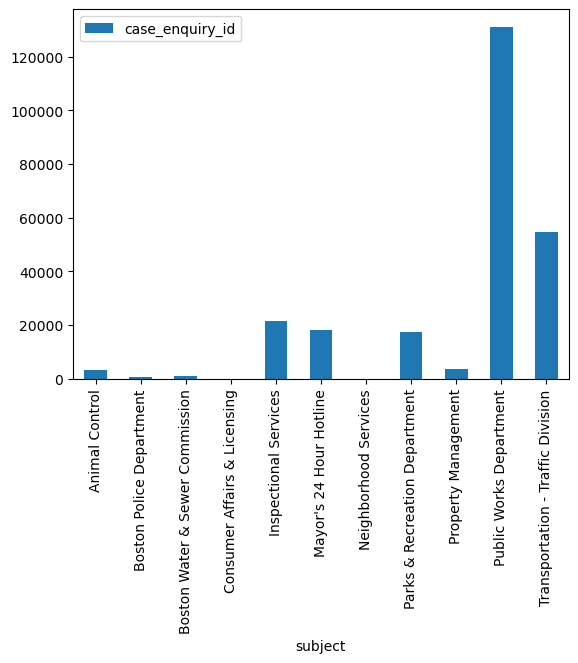

In [16]:
#visualize the results as a histogram (here we use plot.bar() as methods of a dataframe class - this automatically takes care of axe labels and legends
boston311[['subject','case_enquiry_id']].groupby(by=['subject']).count().plot.bar()

### Homework Task 1. 
Report the number of neighborhoods mentioned in the dataset (unique distinct names in "neighborhood" column), and visualize the number of complaints by neighborhood as a bar plot, similar to the one above

## Dataset 2. Real-estate data sales (XLS)

The data contains information on all the residential real estate sold in NYC, including address of the house/unit, its size, age, time of sale and of course the price

In [17]:
#the data is split by year and borough. Take Brooklyn in 2015 
year=2015; boro='brooklyn'

In [18]:
fname=str(year)+'_'+boro+'.xls' #construct the filename wrt to the attributes above

In [19]:
#construct the URL to the proper file
url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/'+str(year)+\
                                                                                       '/'+fname
#alternatively - download and use the fname instead of url

In [20]:
#read pandas dataframe from excel file
#may need to have xlrd module installed to get it work
re_sales = pd.read_excel(url)

In [21]:
re_sales.head() #preview the data - spot the formatting issue!

,"BROOKLYN ANNUALIZE SALE FOR 2015. (All Sales From January 1, 2015 - December 31, 2015)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 3/31/2016. Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neighborhood Name 4/1/16. Descriptive Data as...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31 00:00:00


We'll need to skip first 4 lines to make it pandas-frienly 

And also consider alternative data ingestion approach: download to the local folder first and then upload from local drive

In [22]:
import urllib #use urllib mobule for web requests
dataDir = '' #local data folder to use
urllib.request.urlretrieve(url, dataDir + fname)

('2015_brooklyn.xls', <http.client.HTTPMessage at 0x7f8909b8e100>)

In [23]:
#now upload the data, also skipping the first 4 rows
re_sales = pd.read_excel(dataDir + fname, skiprows = 4)

In [24]:
re_sales = pd.read_excel(url, skiprows = 4) #or do the same directly from the web

In [25]:
re_sales.head() #now the dataframe looks reasonable

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,...,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,...,1,0,1,2417,2106,1930,1,A9,0,2015-09-16
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,...,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,...,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17


In [26]:
re_sales.columns #list of the columns to assess the metadata

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AT PRESENT\n', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AT PRESENT\n', 'ADDRESS\n', 'APARTMENT NUMBER\n',
       'ZIP CODE\n', 'RESIDENTIAL UNITS\n', 'COMMERCIAL UNITS\n',
       'TOTAL UNITS\n', 'LAND SQUARE FEET\n', 'GROSS SQUARE FEET\n',
       'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')

In [27]:
#notice that field names contain an artifact from the original data represenation - end of line symbol '\n'
#this way we won't be able to access the fields as before using "." syntax, but we can still use "[]" syntax like

In [28]:
re_sales['SALE PRICE\n'].sum() #this will be the total sales volume

19990077327

In [29]:
re_sales.describe() #statistics for numeric columns

,BOROUGH\n,BLOCK\n,LOT\n,ZIP CODE\n,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
count,25362.0,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,2.536200e+04,25362
mean,3.0,4207.714534,281.084418,11217.017270,2.376981,0.185474,2.603817,2238.399456,2878.065649,1774.995584,1.699077,7.881901e+05,2015-07-04 15:56:39.006387456
min,3.0,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,2015-01-01 00:00:00
25%,3.0,1768.000000,21.000000,11209.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1910.000000,1.000000,0.000000e+00,2015-04-07 00:00:00
50%,3.0,4149.000000,46.000000,11219.000000,1.000000,0.000000,1.000000,1900.000000,1744.500000,1929.000000,1.000000,3.300000e+05,2015-07-02 00:00:00
75%,3.0,6540.000000,103.000000,11231.000000,2.000000,0.000000,2.000000,2500.000000,2880.000000,1957.000000,2.000000,8.130000e+05,2015-10-01 00:00:00
max,3.0,8955.000000,9033.000000,11249.000000,338.000000,355.000000,355.000000,293000.000000,366000.000000,2016.000000,4.000000,1.690000e+08,2015-12-31 00:00:00
std,0.0,2649.487442,492.384071,186.770716,7.803233,2.711002,8.286863,6372.188724,10178.063689,542.988555,0.944152,3.198035e+06,NaN


It also helps us spot some issues with the data - zero min's for zip code, size, year (also average age of 1774 does not look right and is likely affected by that), sale price show that some records are unreliable

Also lets introduce some descriptive analysis, e.g. total price and average price per unit

In [30]:
re_sales['SALE PRICE\n'].mean() #average price per unit

788190.100425834

In [31]:
re_sales['SALE PRICE\n'][re_sales['SALE PRICE\n']>0].mean() #but now see how different it is, when we first filter out the units with zero sales price [re_sales['SALE PRICE\n']>0]

1236091.8455973286

In [32]:
#or visualizing an average sale price per zip code 
#ideally this would make more sense as a spatial visualization on the map. but let us get to that later
#we'll use groupby here. Note that groupby will apply mean to all the fields other than the ones used for grouping (by)
#so we first filter the datarame to keep only two columns - 'ZIP CODE\n','SALE PRICE\n' - first for grouping, second for taking averages
re_sales[['ZIP CODE\n','SALE PRICE\n']].groupby(by=['ZIP CODE\n']).mean()

,SALE PRICE\n
ZIP CODE,
0,4.892857e+05
11201,1.618065e+06
11203,4.190376e+05
11204,4.908219e+05
11205,7.062129e+05
11206,1.213060e+06
11207,4.006299e+05
11208,3.979557e+05
11209,5.333751e+05


<Axes: xlabel='ZIP CODE\n'>

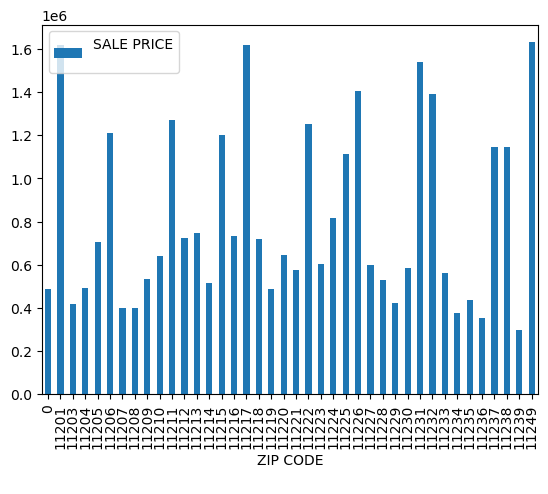

In [33]:
re_sales[['ZIP CODE\n','SALE PRICE\n']].groupby(by=['ZIP CODE\n']).mean().plot.bar() #visualize as a barplot

But price per unit is not always the best characteristics of the market as units might be quite different, ranging from small studios to large houses. Besides particularly expensive ones may affect the averages. Median price is often used along with the price per square foot. In the next excercise, we'll try to compute an average price per square foot. For now let's skip the technical issue like missing/zero data and just plow ahead. In the next lab we'll talk about how those should addressed.

### Homework Task 2. 
Quantify the average price per square foot per zip code (include only the records higher than zero price and footage). Visualize the result as a bar plot. Which zip codes are the three most expensive ones?

Hints: First, use "group_by" to create an aggregate with cumulative price and sq foot size and then add a new field through assignment dividing one by the other. 

You can use sort_values to order dataframe by price per zip code and see the top three zip codes.

Not mandatory, but if you want python to give you a specific list of the top three zip codes, you can use .iloc to slice it and get the index converting it to a list. But then make sure to ignore zip codes with infinite prices (likely due to zero house sizes).

## Dataset 3. Street Pavement Rating

The New York City Department of Transportation is responsible for keeping the City's streets in good repair. The Agency performs ongoing assessment of New York City streets. Ratings are based on a scale from 1 to 10, and results are grouped in the following categories: Good (%) - ratings of 8 to 10, Fair (%) - ratings of 4 to 7, and Poor (%) - ratings of 1 to 3. Rating dates started from 1994 to 2019. This data will allow you to create a map.

GeoJSON is a JSON based format designed to represent the geographical features with their non-spatial attributes. Besides GeoJSON, shapefile is also a common format for geographical datasets. For more information, please check https://geojson.org/.

As JSON contains spatial information (in this case shapes of the streets) along with the data, we'll need a slightly different vehicle to load it. There is a module geopandas which we'll use below. In short its just like pandas, but having a special column "geometry" which is meant to contain spatial info

In [34]:
import geopandas as gpd #import geopandas for dealing with dataframes with spatial information
url = 'https://data.cityofnewyork.us/api/geospatial/2cav-chmn?method=export&format=GeoJSON'
# alternative URL in case this one does not work
# url = 'https://github.com/CUSP2020PUI/Data/raw/master/Street%20Pavement%20Rating.geojson'
rating = gpd.read_file(url) #read and parse the GEOJSON data into a geopandas dataframe

/Users/stanislav/opt/anaconda3/envs/IADS2024/lib/python3.9/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


In [35]:
rating.shape #shape of the dataframe - first is the number of records (streets)

(81209, 13)

In [36]:
rating.head() #lets preview the data

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date,geometry
0,0,0,969,609.854259468,0,5,L,2020,589.0,33.08,FAIR,2020-01-24,"MULTILINESTRING ((-74.21215 40.51645, -74.2119..."
1,0,0,983,257.932161624,0,9,None,2020,258.0,30.0,GOOD,2021-05-20,"MULTILINESTRING ((-74.20972 40.51892, -74.2106..."
2,0,0,999,379.637985455,0,3,None,2020,232.0,30.0,POOR,2019-10-01,"MULTILINESTRING ((-74.20649 40.51486, -74.2054..."
3,0,0,1018,50.2891638427,0,8,L,2020,75.0,34.58,GOOD,2019-10-01,"MULTILINESTRING ((-74.20882 40.51931, -74.2087..."
4,0,0,1050,786.400025432,0,5,None,2020,891.0,30.0,FAIR,2020-01-13,"MULTILINESTRING ((-74.20584 40.51791, -74.2047..."


Geopandas dataframe looks pretty much like pandas (and can be treated that way!) except that it has a special "geometry" column, which contains the shape information as a sequence of points

In [37]:
rating.describe() #try to get descriptive stats for numberic columns...

,rating_date
count,73032
mean,2020-03-26 18:29:06.171540992
min,1900-01-11 00:00:00
25%,2019-08-14 00:00:00
50%,2020-10-15 00:00:00
75%,2021-06-22 00:00:00
max,2021-09-16 00:00:00


In [38]:
#Apparently none other than date are seen as numberic. This is because the values in the dataframe are not treated as numbers but string or categorical values

In [39]:
#if we want them as numbers we need to perform type convertion
rating['length'] = pd.to_numeric(rating['length'], errors='coerce').astype('int')
rating['length'].describe()

count    81209.000000
mean       382.526321
std        250.159451
min          6.000000
25%        238.000000
50%        288.000000
75%        505.000000
max       6795.000000
Name: length, dtype: float64

In [40]:
#now let's count how many streets are in either condition based on 'rating_word'
rating['rating_word'].value_counts()

rating_word
GOOD    46857
FAIR    24893
NR       8177
POOR     1282
Name: count, dtype: int64

In [41]:
#now let's count the cumulative length of those in either condition based on 'rating_word' (same grouping, but rather than counting we'll summarize the length per group
rating[['rating_word','length']].groupby(by=['rating_word']).sum()

,length
rating_word,
FAIR,9381754
GOOD,18353318
NR,2812315
POOR,517193


<Axes: ylabel='length'>

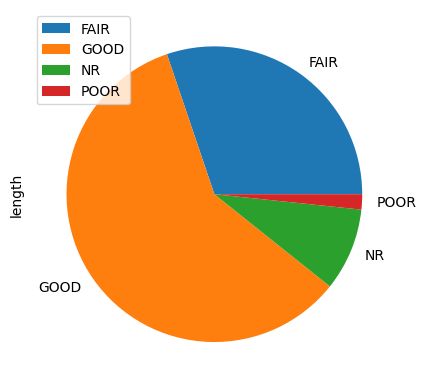

In [42]:
#and visualize overall conditions of the roads using piechart (built-in pandas method)
rating[['rating_word','length']].groupby(by=['rating_word']).sum().plot.pie(y='length')

And let's use the true power of geopandas - visualize the streetmap

<Axes: >

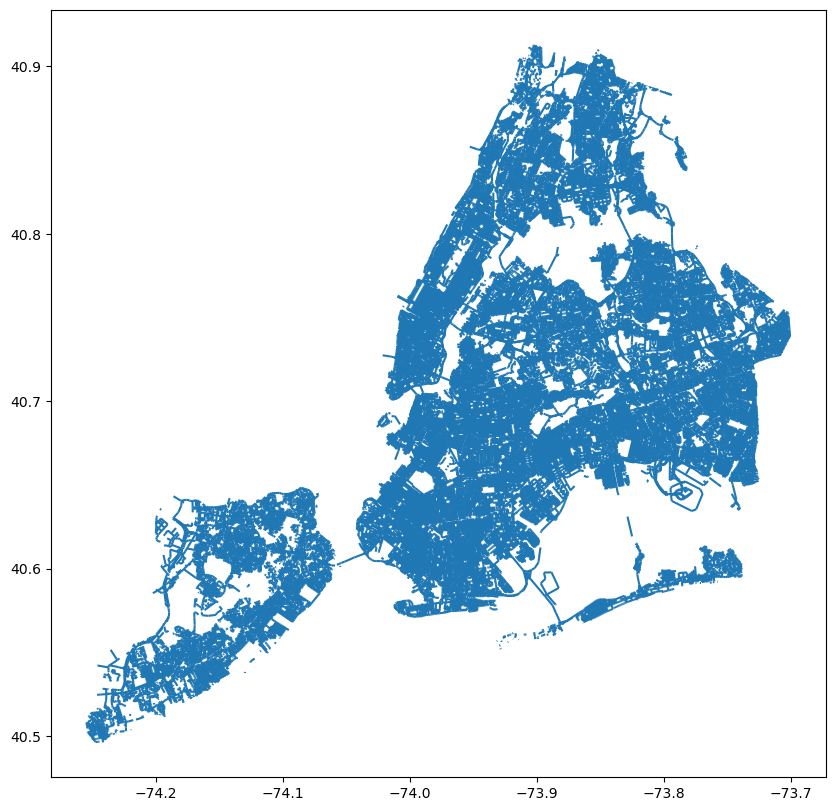

In [43]:
rating.plot(column=None, figsize=(10,10)) #first just the shapes of the streetmap without any information

<Axes: >

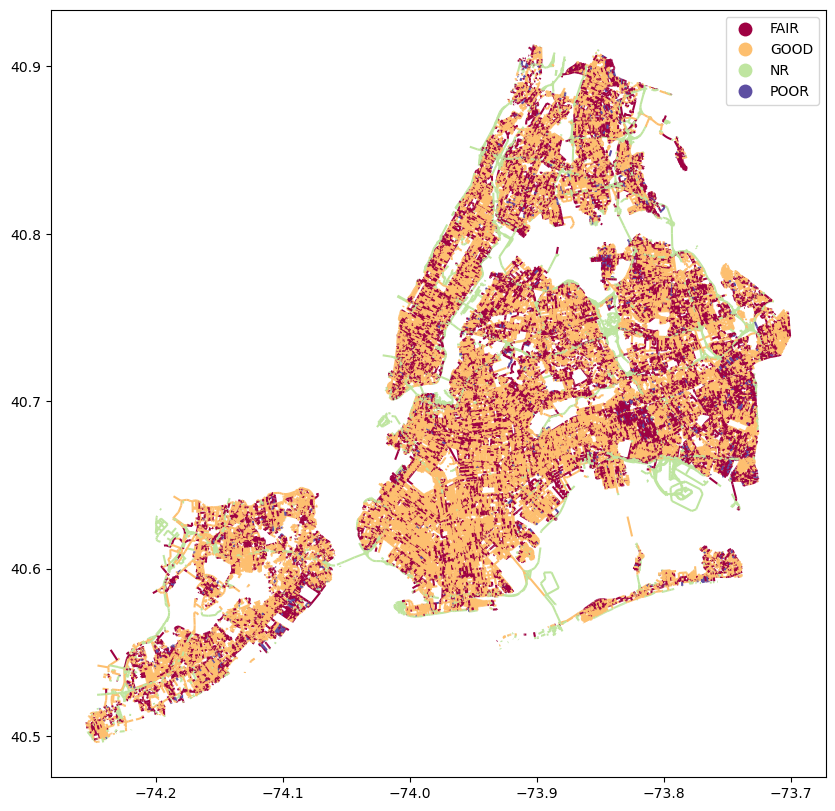

In [44]:
#and now visualize the streets according to their status, provided in the rating_word column
rating.plot(column='rating_word',cmap='Spectral',figsize=(10,10),legend=True)

### Dataset 4. COVID-19 Data by ZIP Code

This dataset includes confirmed case rates, case counts, death rates, death counts, and the percent of people tested with a positive result since March. Follwing download links refer to the dataset uploaded on Sep 1st. Dataset is provided by NYC health, please check https://www1.nyc.gov/site/doh/covid/covid-19-data.page for more information and other COVID19 related datasets.

### Howework Task 3: 
    
    a) Aggregate dataset by Borough, calculate total cases amount in each Borough, and then visualize as a barplot
    
    b) Calculate borough-wise positive case percentage within all the tests administered within the borough (positivity rate among the tests), visualize as a barplot 
    
    c) Calculate borough-wise positive case percentage within the borough population (%% of population tested positive), and visualize as barplot. 
    
    Notice that both quantities b) and c) matter as otherwise the percentage of people tested positive might depend on the testing availability and practice which are not necessary consistent accross boroughs.


Hint: The column for case amount is “COVID_CASE_COUNT". Try groupby function in pandas to get total cases and tests by borough. Positive case percentage is ‘100*COVID_CASE_COUNT'/'TOTAL_COVID_TESTS'. To calculate positive case percentage, you might first need a borough level dataframe.

In [45]:
#upload the covid testing data
url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/7953c97d1e58bbed9934ea04affb12ca74d9c0fb/data-by-modzcta.csv'
df = pd.read_csv(url)

In [46]:
df.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,441,1871.58,23563.03,26,110.34,6.50,6786
1,10002,Chinatown/Lower East Side,Manhattan,1335,1739.29,76755.41,161,209.76,7.66,17439
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,543,1009.26,53801.62,35,65.05,3.53,15381
3,10004,Financial District,Manhattan,40,1095.71,3650.61,1,27.39,4.84,827
4,10005,Financial District,Manhattan,96,1143.39,8396.11,2,23.82,4.53,2117
